In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
x, y, z = symbols('x y z')

# set ndigits to out
pd.set_option('display.float_format', lambda x: '%.5f' % x)

There is three restrictions for equation to solve by this method:

$$ \exists F''(x),\  F'(x) \neq 0,\ F'(x)\ \textrm{and}\ F''(x)\ \textrm{does not change sign in } [a, b]$$ 

Algorithm:

$$ x^{k+1}\ =\ x^{k}\ -\ \frac{F(x^k)}{F'(x^k)},\ k\ =\ 1,\ 2,\ 3,\ ...$$ 

In [2]:
def optimize(f_x, derivative_f, x, delta=0.0001):

    cnt = 0
    x_next = 0
    hist = [[] for i in range(3)]
    dx = derivative_f(f_x)
    
    while 1:
        x_next = x - f_x(x) / dx(x)
        x = x_next

        hist[0].append(cnt)
        hist[1].append(x)
        hist[2].append(f_x(x))

        cnt += 1
        if cnt > 2:
            if abs(hist[2][cnt - 2] - f_x(x)) < delta:
                break

    return hist

Define function and find its derivative:

In [3]:
def f_x(x):
    return x ** 3 - x ** 2 + x + 2
f_x(x)

x**3 - x**2 + x + 2

In [4]:
def derivative_f(f_x):
    return lambdify(x, diff(f_x(x), x))

We can define start aproximation by plot:

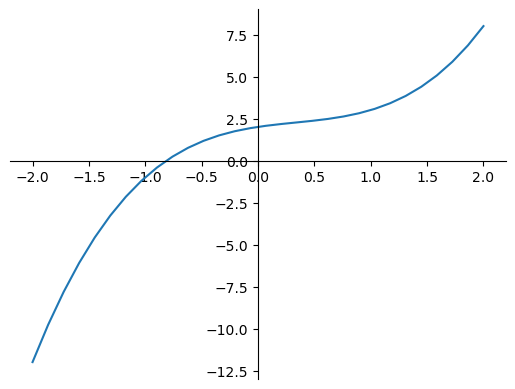

In [5]:
xa = np.linspace(-2, 2, 30)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xa, f_x(xa))
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

In [6]:
hist = optimize(f_x, derivative_f, 0.5, .001)

In [9]:
d_first = {'num iter': hist[0], 'x': hist[1], 'f(x)': hist[2]}
df = pd.DataFrame(data=d_first)

In [11]:
df.style.hide(axis="index")

num iter,x,f(x)
0,-2.666667,-26.740741
1,-1.700134,-7.504750
2,-1.126009,-1.821568
3,-0.867840,-0.274595
4,-0.812867,-0.010724
5,-0.810540,-0.000019
6,-0.810536,-0.000000


Let's see tangent lines on more convex function:

In [13]:
def view(x):
    return 0.005 * np.e ** x - 1
view(x)

0.005*2.71828182845905**x - 1

In [17]:
def derivative_view(view):
    return lambdify(x, diff(view(x), x))

In [24]:
hist_sec = optimize(view, derivative_view, 10)
d_second = {'num iter': hist_sec[0], 'x': hist_sec[1], 'f(x)': hist_sec[2]}
df2 = pd.DataFrame(data=d_second)

In [33]:
df2.style.hide(axis="index")

num iter,x,f(x)
0,9.009080,39.884974
1,8.033539,14.413157
2,7.098418,5.050259
3,6.263701,1.625794
4,5.644538,0.413714
5,5.351894,0.055038
6,5.299727,0.001411
7,5.298318,0.000001
8,5.298317,0.000000


In [34]:
def plot_tangent(f_x, derivative, x_ax, num_iter, hist):
    """
    :param f_x: function to that tangent line will be plotted
    :param derivative: derivative of above function
    :param x_ax: ndarray for plotting
    :param num_iter: sets iteration for which tangent line will be plotted
    Function will plot line on the active axes
    """
    tangent_line = tangent(hist[1][num_iter], view, derivative, x_ax)
    ax.plot(x_ax[np.where(tangent_line > 0)], (tangent_line[np.where(tangent_line > 0)]))
    x_next = -f_x(hist[1][num_iter]) / derivative(hist[1][num_iter]) + hist[1][num_iter]
    # dot on Ox
    ax.scatter(x_next, 0, marker='x', color='r', s=45, label=f'X for {num_iter + 1} iter')
    ax.legend()
    # Function value in above dot. X_k+1 for iteration process.
    ax.vlines(x_next, ymax=view(x_next), ymin=0, linestyle='--')
    
def tangent(a, f_x, derivative, xa):
    return f_x(a) + derivative(f_x)(a) * (xa - a)

TypeError: 'float' object is not callable

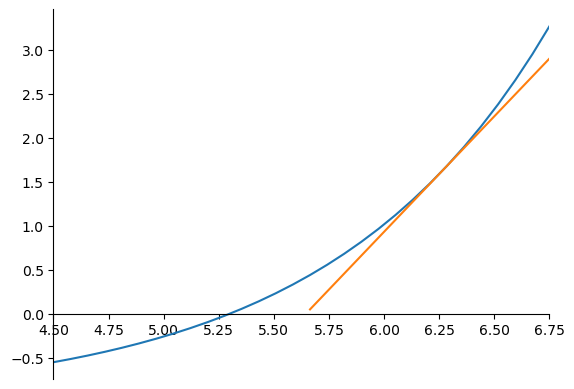

In [35]:
xa = np.linspace(4.5, 6.75, 30)
xxa = np.linspace(4.5, 6.75, 30)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(4.5, 6.75)
ax.plot(xa, view(xa))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plot_tangent(view, derivative_view, xxa, 3, hist_sec)
plot_tangent(view, derivative_view, xxa, 4, hist_sec)